In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [2]:
features = np.loadtxt("hw4-bundle/bundle_files/svm/data/features.txt", delimiter=",")
target = np.loadtxt("hw4-bundle/bundle_files/svm/data/target.txt", delimiter=",")

In [3]:
def svm_loss(w, b, C, D):
    X, y = D
    return (np.linalg.norm(w) ** 2) / 2 + C * np.sum(np.maximum(0, 1 - y * (X @ w + b)))

def BGD_converge_criterion(w_last, w_curr, b_last, b_curr, C, eps, D):
    loss_last = svm_loss(w_last, b_last, C, D)
    loss_curr = svm_loss(w_curr, b_curr, C, D)

    return (np.abs(loss_last - loss_curr) / loss_last * 100) < eps, loss_curr

def SGD_converge_criterion(delta_last, w_last, w_curr, b_last, b_curr, C, eps, D):
    loss_last = svm_loss(w_last, b_last, C, D)
    loss_curr = svm_loss(w_curr, b_curr, C, D)

    delta_curr = (delta_last + (np.abs(loss_last - loss_curr) / loss_last * 100)) / 2
    
    return delta_curr < eps, delta_curr, loss_curr

def MBGD_converge_criterion(delta_last, w_last, w_curr, b_last, b_curr, C, eps, D):
    loss_last = svm_loss(w_last, b_last, C, D)
    loss_curr = svm_loss(w_curr, b_curr, C, D)

    delta_curr = (delta_last + (np.abs(loss_last - loss_curr) / loss_last * 100)) / 2
    
    return delta_curr < eps, delta_curr, loss_curr

In [4]:
def partial_w(w, b, C, D):
    X, y = D
    ind = ((y * (X @ w + b)) < 1)
    return w + C * np.sum((-y * X.T) * ind, axis = 1)

def partial_b(w, b, C, D):
    X, y = D
    ind = ((y * (X @ w + b)) < 1)
    return C * np.sum(-y * ind)

## BGD

In [5]:
### Algorithm hyperparameters ###
n, d = features.shape
beta = n
eta = 3e-7
eps = 0.25
C = 100

### Algorithm starts ###
start = time.perf_counter()

t = 0
k = 0
B = (features.copy(), target.copy())

# initializing parameters
w_last = np.zeros(d)
w_curr = np.zeros(d)
b_last = 0
b_curr = 0

criterion_flag, loss_init = BGD_converge_criterion(w_last, w_curr, b_last, b_curr, C, eps, B)
criterion_flag = False
BGD_loss_history = [loss_init]

print(f"At iteration {0}, the loss is {loss_init}")

while (not criterion_flag):
    t += 1

    w_curr = w_last - eta * partial_w(w_last, b_last, C, B)
    b_curr = b_last - eta * partial_b(w_last, b_last, C, B)

    criterion_flag, loss_curr = BGD_converge_criterion(w_last, w_curr, b_last, b_curr, C, eps, B)
    BGD_loss_history.append(loss_curr)

    w_last = w_curr
    b_last = b_curr

    if (t % 10 == 0):
        print(f"At iteration {t}, the loss is {loss_curr}")

end = time.perf_counter()

print(f"After {t} iterations, the BGD algorithm converges with the final loss {loss_curr} and total runtime {end - start}.")
    

At iteration 0, the loss is 641400.0
At iteration 10, the loss is 299041.7240443215
At iteration 20, the loss is 288891.9874790435
At iteration 30, the loss is 280215.3999819483
At iteration 40, the loss is 271913.2894279097
At iteration 50, the loss is 263796.0193209961
After 57 iterations, the BGD algorithm converges with the final loss 258701.31831506777 and total runtime 0.3890097000003152.


## SGD

In [6]:
### Algorithm hyperparameters ###
n, d = features.shape
beta = 1
eta = 1e-4
eps = 1e-3
C = 100

rng = np.random.default_rng(1)
permuted_idx = rng.permutation(np.arange(n))
X_permuted = features[permuted_idx]
y_permuted = target[permuted_idx]

### Algorithm starts ###
start = time.perf_counter()
t = 0
k = 0

# initializing parameters
w_last = np.zeros(d)
w_curr = np.zeros(d)
b_last = 0
b_curr = 0

criterion_flag, delta_curr, loss_init = SGD_converge_criterion(0, w_last, w_curr, b_last, b_curr, C, eps, (X_permuted, y_permuted))
criterion_flag = False
SGD_loss_history = [loss_init]

print(f"At iteration {0}, the loss is {loss_init}")

while (not criterion_flag):
    t += 1

    B = (X_permuted[[k]], y_permuted[k])

    w_curr = w_last - eta * partial_w(w_last, b_last, C, B)
    b_curr = b_last - eta * partial_b(w_last, b_last, C, B)
    k = (k + 1) % n

    criterion_flag, delta_curr, loss_curr = SGD_converge_criterion(delta_curr, w_last, w_curr, b_last, b_curr, C, eps, (X_permuted, y_permuted))
    SGD_loss_history.append(loss_curr)

    w_last = w_curr
    b_last = b_curr

    if (t % 10 == 0):
        print(f"At iteration {t}, the loss is {loss_curr}")

end = time.perf_counter()

print(f"After {t} iterations, the SGD algorithm converges with the final loss {loss_curr} and total runtime {end - start}.")
    

At iteration 0, the loss is 641400.0
At iteration 10, the loss is 479488.1539854642
At iteration 20, the loss is 380777.7873144632
At iteration 30, the loss is 347167.0355100073
At iteration 40, the loss is 314189.9134280936
At iteration 50, the loss is 311773.9322800378
At iteration 60, the loss is 314579.3368050551
At iteration 70, the loss is 317066.18001596374
At iteration 80, the loss is 306657.872004755
At iteration 90, the loss is 306215.2966390157
At iteration 100, the loss is 303389.4722078783
At iteration 110, the loss is 303217.8694768212
At iteration 120, the loss is 309237.6021344119
At iteration 130, the loss is 300631.86432321795
At iteration 140, the loss is 301237.016769103
At iteration 150, the loss is 301846.00257234235
At iteration 160, the loss is 320297.115955175
At iteration 170, the loss is 300203.62246046343
At iteration 180, the loss is 309081.9785646215
At iteration 190, the loss is 297500.2554740777
At iteration 200, the loss is 310749.7410368015
At iteratio

## MBGD

In [7]:
### Algorithm hyperparameters ###
n, d = features.shape
beta = 20
num_batch = np.ceil(n / beta)
eta = 1e-5
eps = 1e-2
C = 100

rng = np.random.default_rng(547)
permuted_idx = rng.permutation(np.arange(n))
X_permuted = features[permuted_idx]
y_permuted = target[permuted_idx]

### Algorithm starts ###
start = time.perf_counter()
t = 0
k = 0

# initializing parameters
w_last = np.zeros(d)
w_curr = np.zeros(d)
b_last = 0
b_curr = 0

criterion_flag, delta_curr, loss_init = MBGD_converge_criterion(0, w_last, w_curr, b_last, b_curr, C, eps, (X_permuted, y_permuted))
criterion_flag = False
MBGD_loss_history = [loss_init]

print(f"At iteration {0}, the loss is {loss_init}")

while (not criterion_flag):
    t += 1

    B = (X_permuted[(beta * k): min(beta * (k + 1), n), ], y_permuted[(beta * k): min(beta * (k + 1), n)])

    w_curr = w_last - eta * partial_w(w_last, b_last, C, B)

    b_curr = b_last - eta * partial_b(w_last, b_last, C, B)
    k = int((k + 1) % num_batch)

    criterion_flag, delta_curr, loss_curr = MBGD_converge_criterion(delta_curr, w_last, w_curr, b_last, b_curr, C, eps, (X_permuted, y_permuted))
    MBGD_loss_history.append(loss_curr)

    w_last = w_curr
    b_last = b_curr

    if (t % 10 == 0):
        print(f"At iteration {t}, the loss is {loss_curr}")

end = time.perf_counter()

print(f"After {t} iterations, the MBGD algorithm converges with the final loss {loss_curr} and total runtime {end - start}.")
    

At iteration 0, the loss is 641400.0
At iteration 10, the loss is 378814.6781079631
At iteration 20, the loss is 315175.5958326847
At iteration 30, the loss is 311949.43209563626
At iteration 40, the loss is 311341.50002378825
At iteration 50, the loss is 309670.46023356216
At iteration 60, the loss is 306456.19051171944
At iteration 70, the loss is 305563.27482993325
At iteration 80, the loss is 303119.5862402794
At iteration 90, the loss is 301580.0327512516
At iteration 100, the loss is 300230.8729748098
At iteration 110, the loss is 299239.64534144057
At iteration 120, the loss is 298864.6021848591
At iteration 130, the loss is 298438.74358388974
At iteration 140, the loss is 297411.81023616804
At iteration 150, the loss is 295813.333309539
At iteration 160, the loss is 294894.4217839132
At iteration 170, the loss is 293429.23857469746
At iteration 180, the loss is 292787.51115552755
At iteration 190, the loss is 291564.7441206438
At iteration 200, the loss is 291661.8063979103
At 

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_18128\2762789100.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


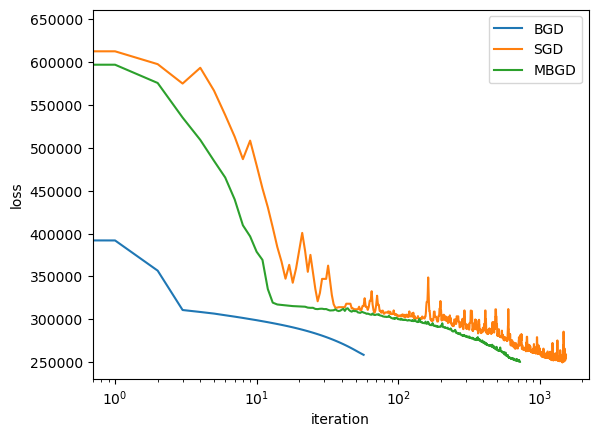

In [13]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(BGD_loss_history)), BGD_loss_history, label = "BGD")
ax.plot(np.arange(len(SGD_loss_history)), SGD_loss_history, label = "SGD")
ax.plot(np.arange(len(MBGD_loss_history)), MBGD_loss_history,  label = "MBGD")
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.legend()
fig.show()